In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Choose a pre-trained model (e.g., VGG19)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Add custom top layers for CIFAR10
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512),
    layers.LeakyReLU(negative_slope=0.1),  # Leaky ReLU activation
    layers.Dropout(0.5),
    layers.Dense(256),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Dropout(0.5),
    layers.Dense(128),
    layers.LeakyReLU(negative_slope=0.1),
    layers.Dense(10, activation='softmax')  # Output for CIFAR10
])

model.summary()

# Freeze base model layers for initial evaluation
for layer in base_model.layers:
    layer.trainable = False

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,452,554 (78.02 MB)

 Trainable params: 20,452,554 (78.02 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',   # Watch validation loss
    factor=0.5,           # Reduce LR by a factor of 0.5
    patience=3,           # Wait for 3 epochs of no improvement
    verbose=1             # Print updates
)

In [6]:
# Compile and evaluate without fine-tuning
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history1 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, callbacks = [lr_scheduler])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.3659 - loss: 1.7565 - val_accuracy: 0.5119 - val_loss: 1.3780 - learning_rate: 0.0010
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - accuracy: 0.4947 - loss: 1.4352 - val_accuracy: 0.5385 - val_loss: 1.3030 - learning_rate: 0.0010
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.5193 - loss: 1.3646 - val_accuracy: 0.5472 - val_loss: 1.2895 - learning_rate: 0.0010
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5368 - loss: 1.3251 - val_accuracy: 0.5652 - val_loss: 1.2380 - learning_rate: 0.0010
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.5503 - loss: 1.2818 - val_accuracy: 0.5678 - val_loss: 1.2364 - learning_rate: 0.0010
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.5563 - loss: 1.2681 - val_accuracy: 0.5757 - val_loss: 1.2108 - learning_rate: 0.0010
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accura

In [8]:
print("Evaluating with pre-trained weights:")
model.evaluate(x_test, y_test)

Evaluating with pre-trained weights:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5965 - loss: 1.1713


[1.1794718503952026, 0.5935999751091003]

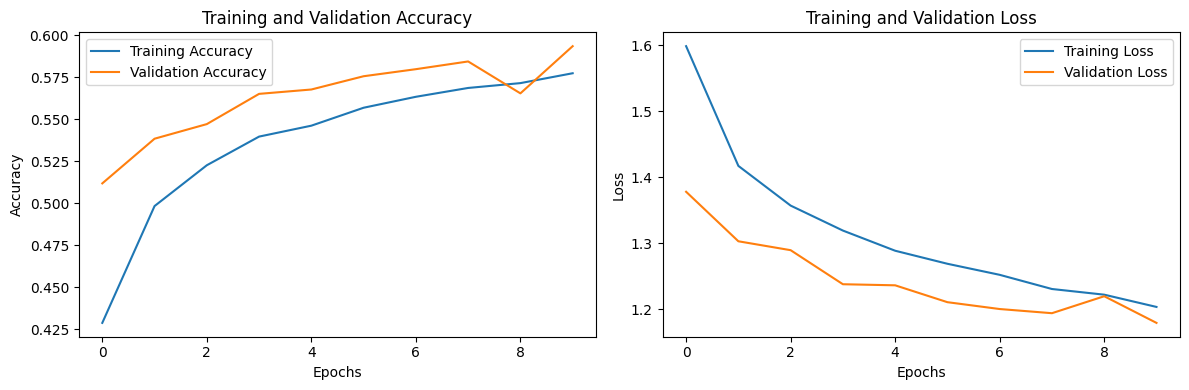

In [9]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Finetune the model

In [12]:
# Fine-tune the model
for layer in base_model.layers:
    layer.trainable = True  # Unfreeze for fine-tuning

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, callbacks=[lr_scheduler])

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 62ms/step - accuracy: 0.6506 - loss: 1.0765 - val_accuracy: 0.7708 - val_loss: 0.6815 - learning_rate: 1.0000e-04
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 58ms/step - accuracy: 0.7948 - loss: 0.6354 - val_accuracy: 0.8012 - val_loss: 0.6169 - learning_rate: 1.0000e-04
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 0.8415 - loss: 0.4966 - val_accuracy: 0.8225 - val_loss: 0.5535 - learning_rate: 1.0000e-04
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 58ms/step - accuracy: 0.8801 - loss: 0.3792 - val_accuracy: 0.8369 - val_loss: 0.5100 - learning_rate: 1.0000e-04
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.9047 - loss: 0.3045 - val_accuracy: 0.8355 - val_loss: 0.5366 - learning_rate: 1.0000e-04
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 60ms/step - accuracy: 0.9250 - loss: 0.2397 - val_accuracy: 0.8460 - val_loss: 0.5207 - learning_rate: 1.0000e-04
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━

In [14]:
# Evaluate the fine-tuned model
print("Evaluating after fine-tuning:")
model.evaluate(x_test, y_test)

Evaluating after fine-tuning:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8640 - loss: 0.6401


[0.641581118106842, 0.8633000254631042]

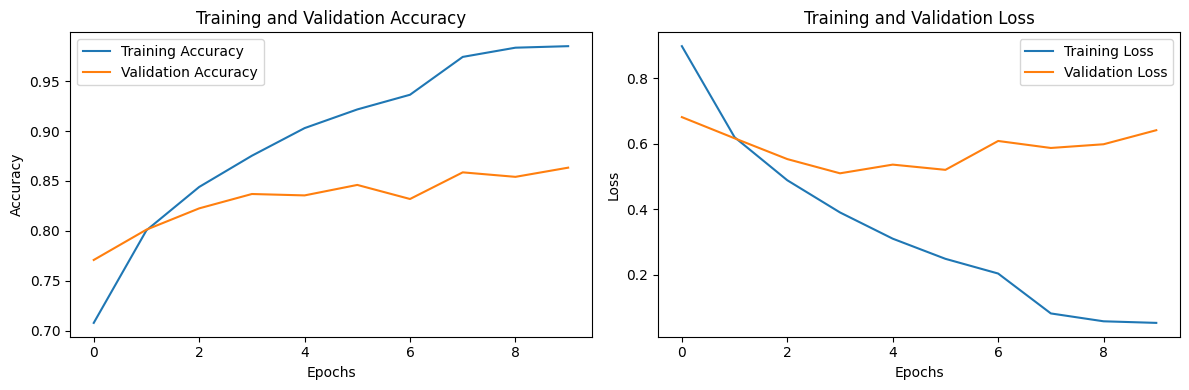

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()